# COGS516 - Assignment 1

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below

In [1]:
student = {
    'name' : "Abdullah Burkan" ,
    'surname' : "BEREKETOGLU", 
    'studentNumber' : "2355170"
}

print(student)

{'name': 'Abdullah Burkan', 'surname': 'BEREKETOGLU', 'studentNumber': '2355170'}


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

1. Suppose you have an ignorant prior about the proportion of the water on Earth's surface. Suppose the globe tossing data has 5 water and 2 land. Compute the posterior distribution using the grid approximation. Draw the posterior distribution plot.

Ignorant prior as uniform, $\text{Uniform}(0,1)$ prior, picked therefore we get density function of the 50 values linearly separated.


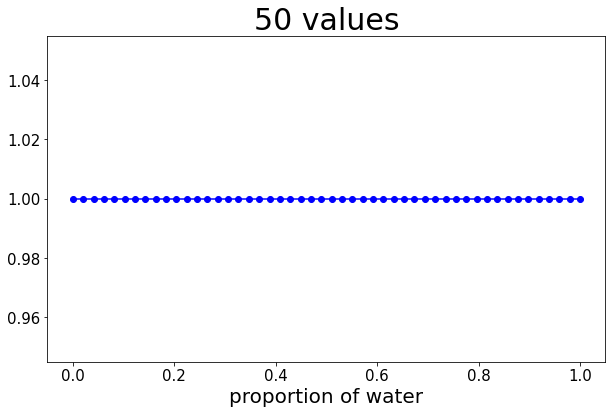

In [3]:
n = 50
x = np.linspace(0, 1, n)
prior = stats.uniform.pdf(x,0,1)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("proportion of water",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("{} values".format(n),fontsize=30)
ax.plot(x, prior, 'b-o', label=('')) 

$$p \sim \text{Uniform}(0,1) \\ W \sim \text{Binomial}(p, N)$$ 
is our model.

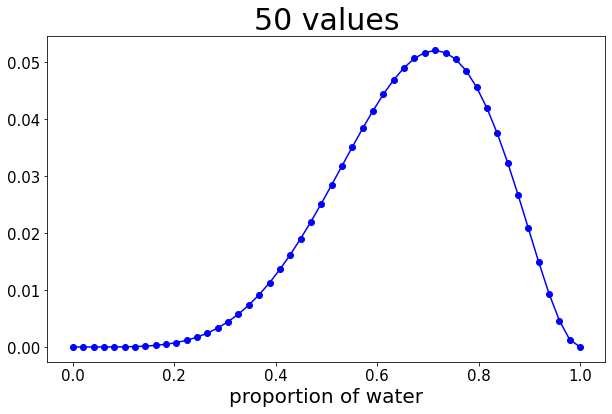

In [4]:
post = stats.binom.pmf(5,p = x, n = 7) * prior
post = post / sum(post)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("proportion of water",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("{} values".format(n),fontsize=30)
ax.plot(x, post, 'b-o', label=('')) 

2. Suppose the globe tossing data has 5 water and 2 land. But your prior is zero below $p = 0.5$ and a constant above $p = 0.5$. Compute the posterior distribution using the grid approximation. Draw the posterior distribution plot.

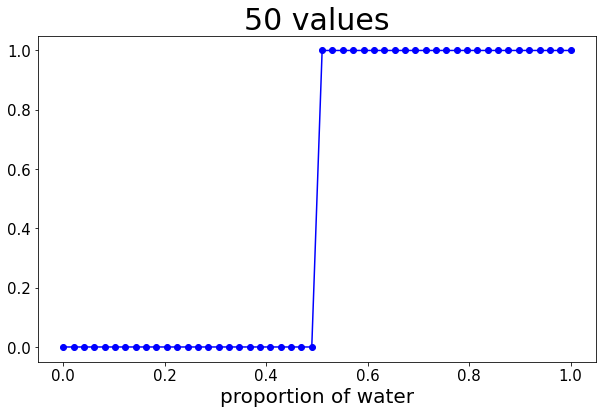

In [5]:
n2 = 50
x2 = np.linspace(0, 1, n2)
prior2 = stats.uniform.pdf(x2,0.5,1) # this gives uniform density function with threshold of 0.5 bottom and 1 top.

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("proportion of water",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("{} values".format(n),fontsize=30)
ax.plot(x2, prior2, 'b-o', label=('')) 

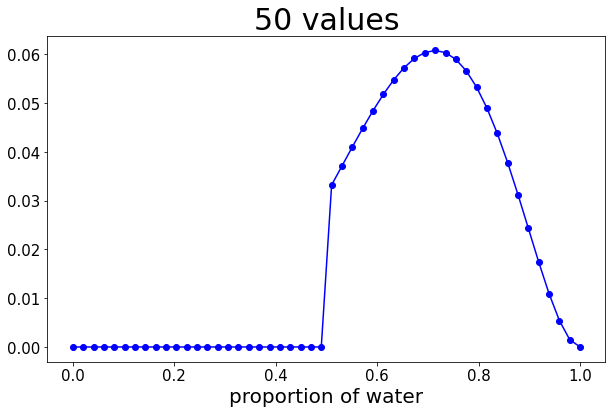

In [6]:
post2 = stats.binom.pmf(5,p = x2, n = 7) * prior2 # binomial distribution results and prior results made up the posterior
post2 = post2 / sum(post2) # normalize the units of posterior

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("proportion of water",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("{} values".format(n),fontsize=30)
ax.plot(x2, post2, 'b-o', label=(''))

- Compute the mean, standard deviation and 93% Highest Density Interval (HDI) of the posterior. 

In [7]:
ns = 500
samples = np.random.choice(x2, size = ns, p = post2) # random sampling

samples.mean() # mean

0.7091836734693877

In [8]:
np.std(samples) # standard deviation

0.11366357631078847

In [9]:
az.hdi(samples, hdi_prob=.93) # HDI 93%

array([0.51020408, 0.89795918])

3. In a 1963 issue of The Journal of Abnormal and Social Psychology, Stanley Milgram described a study in which he investigated the propensity of people to obey orders from authority figures, even when those orders may harm other people (Milgram 1963). In the paper, Milgram describes the study as:

> “consist[ing] of ordering a naive subject to administer electric shock to a victim. A simulated shock generator is used, with 30 clearly marked voltage levels that range from IS to 450 volts. The instrument bears verbal designations that range from Slight Shock to Danger: Severe Shock. The responses of the victim, who is a trained confederate of the experimenter, are standardized. The orders to administer shocks are given to the naive subject in the context of a `learning experiment’ ostensibly set up to study the effects of punishment on memory. As the experiment proceeds the naive subject is commanded to administer increasingly more intense shocks to the victim, even to the point of reaching the level marked Danger: Severe Shock.”

Suppose Milgram had a flat (Uniform) prior for probability that a participant will inflict maximum shock $\pi$. 40 people participated in the experiment and 26 of them inflicted maximum shock. Compute the posterior distribution for $\pi$ using grid approximation. Draw the posterior distribution plot, present the mean, standard deviation and 94% HDI of the posterior distribution. 



In [10]:
n = 50
x3 = np.linspace(0, 1, n)
prior3 = stats.uniform.pdf(x3,0,1)
post3 = stats.binom.pmf(26,p = x3, n = 40) * prior3
post3 = post3 / np.sum(post3)

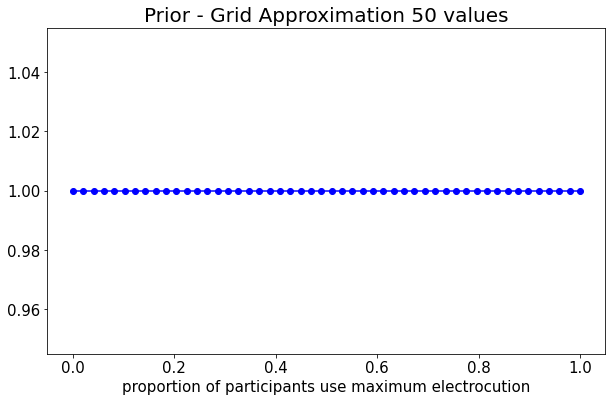

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("proportion of participants use maximum electrocution",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("Prior - Grid Approximation 50 values".format(n),fontsize=20)
ax.plot(x, prior3, 'b-o', label=('')) 

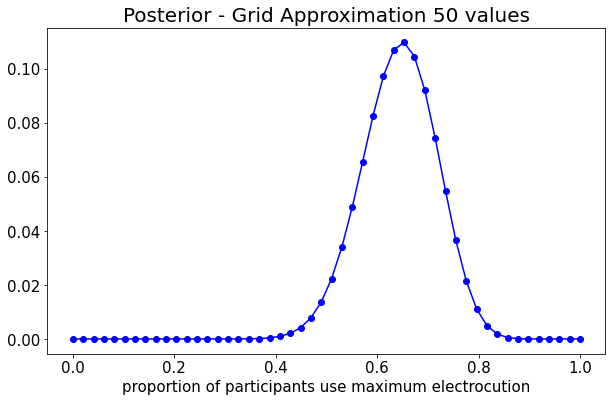

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("proportion of participants use maximum electrocution",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("Posterior - Grid Approximation 50 values".format(n),fontsize=20)
ax.plot(x3, post3, 'b-o', label=('')) 

In [13]:
ns = 500
samples2 = np.random.choice(x3, size = ns, p = post3)

samples2.mean() # mean

0.6519999999999999

In [14]:
np.std(samples2) # standard deviation

0.07022690658854518

In [15]:
az.hdi(samples2, hdi_prob=.94) # HDI 94%

array([0.48979592, 0.75510204])

- Compute the probability that posterior distribution is greater than 0.5 $P(\pi \geq 0.5)$.

In [16]:
np.sum(samples2 >= 0.5) / ns #posterior probability being equal or greater than 0.5.

0.982

- Suppose Milgram had a low prior belief regarding the probability that a person will inflict shock $\pi$. Show this prior belief with an appropriate $\text{Beta}$ distribution. Compute the posterior distribution for this prior using grid approximation (40 participants, 26 incflict maximum shock). Draw the posterior distribution plot, present the mean, standard deviation and 94% HDI of the posterior distribution. 

In [17]:
n = 50
x4 = np.linspace(0, 1, n)
prior4 = stats.beta.pdf(x4, a = round(3.25,0), b = round(1.75,0))
# low belief beta prior for the result that has same 26,40 logic but lower belief level.
# approximated 1.75 - 3.25 with round. 1.75 is 14/8 and 3.25 is 26/8
likelihood = stats.binom.pmf(26,n = 40, p = x4) 
post4 = likelihood * prior4
post4 = post4 / np.sum(post4)

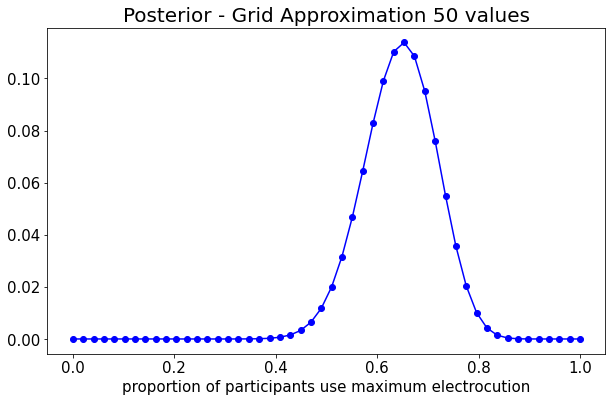

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("proportion of participants use maximum electrocution",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("Posterior - Grid Approximation 50 values".format(n),fontsize=20)
ax.plot(x4, post4, 'b-o', label=('')) 

In [19]:
ns = 500
samples3 = np.random.choice(x4, size = ns, p = post3)

samples3.mean() # mean

0.6406938775510204

In [20]:
np.std(samples3) # standard deviation

0.07451289549580448

In [21]:
az.hdi(samples3, hdi_prob=.94) # HDI 94%

array([0.51020408, 0.7755102 ])

## Submission

Submit your assignment report as a Jupyter notebook markdown file `.ipynb`  format. Your submission should include both textual descriptions (in markdown blocks) and code (in code blocks). Markdown blocks can be formatted in markdown language. [See here](https://guides.github.com/features/mastering-markdown/) to learn more. 